d:\Anaconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 68/68 [00:46<00:00,  1.45it/s]


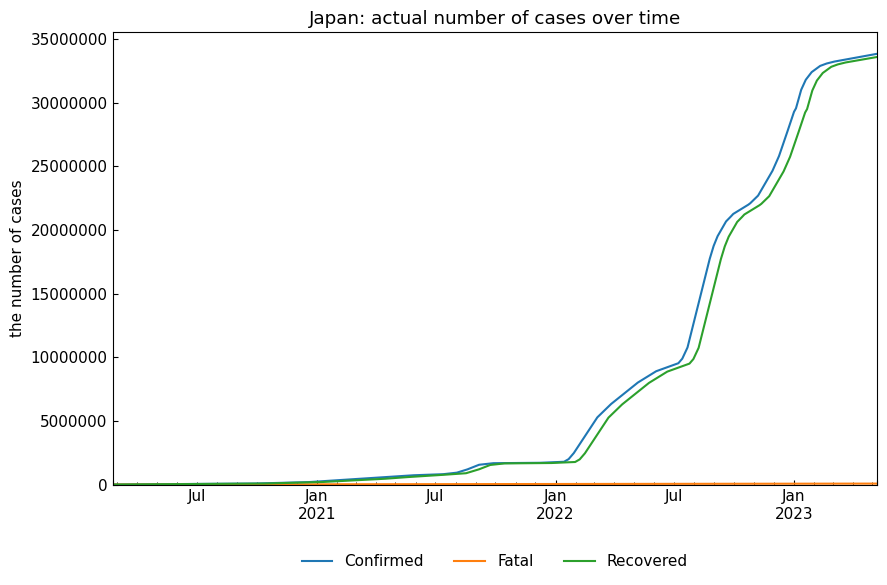

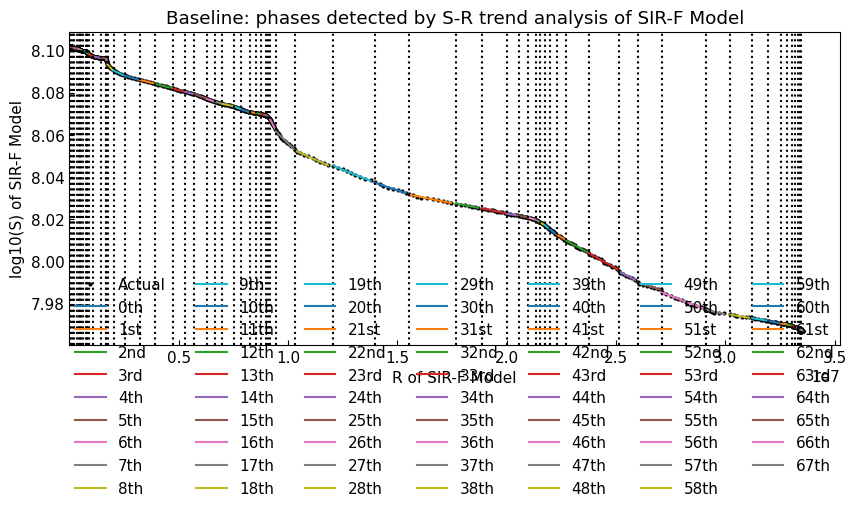

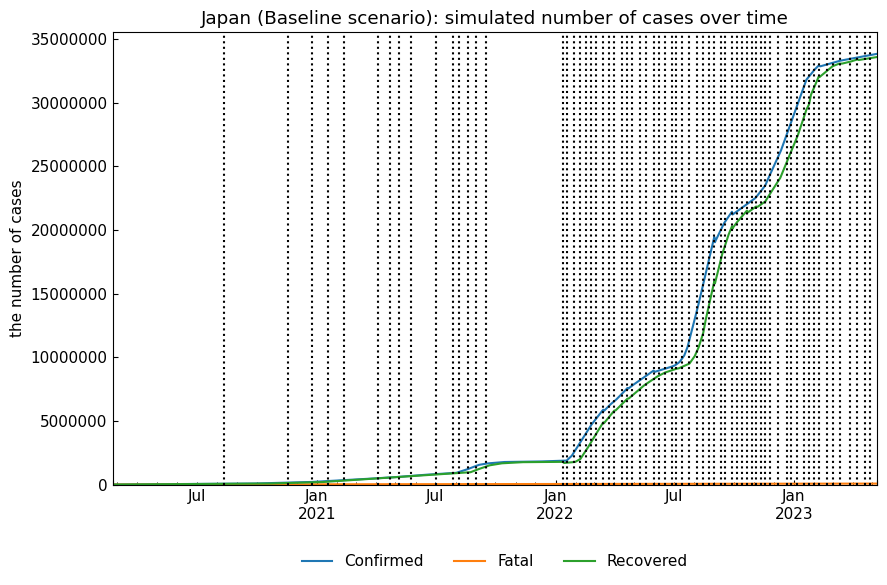

Using 9 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "fake_date", "transformations": {"0": "DifferencedTransformer", "1": "SinTrend"}, "transformation_params": {"0": {}, "1": {}}}
Model Number: 2 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "mean", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "DifferencedTransformer"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": null}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}
Model Number: 3 with model AverageValueNaive in generation 0 of 1 with params {"method": "Mean"} and transformations {"fillna": "rolling_mean_24", "transformations": {"0": "SeasonalDifference", "1": "Round", "2": "Detrend"}, "transformation_params": {"0": {"lag_1": 7, "method": "M

d:\Anaconda3\envs\pytorch\Lib\site-packages\sklearn\preprocessing\_data.py:3475: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


Model Number: 18 with model SeasonalityMotif in generation 0 of 1 with params {"window": 5, "point_method": "weighted_mean", "distance_metric": "mae", "k": 10, "datepart_method": "common_fourier"} and transformations {"fillna": "nearest", "transformations": {"0": "AlignLastValue"}, "transformation_params": {"0": {"rows": 1, "lag": 1, "method": "multiplicative", "strength": 1.0, "first_value_only": false}}}
Model Number: 19 with model SectionalMotif in generation 0 of 1 with params {"window": 7, "point_method": "median", "distance_metric": "canberra", "include_differenced": true, "k": 5, "stride_size": 1, "regression_type": null} and transformations {"fillna": "ffill", "transformations": {"0": "SeasonalDifference", "1": "AlignLastValue", "2": "SeasonalDifference", "3": "LevelShiftTransformer"}, "transformation_params": {"0": {"lag_1": 7, "method": "Median"}, "1": {"rows": 1, "lag": 2, "method": "additive", "strength": 1.0, "first_value_only": false}, "2": {"lag_1": 12, "method": 5}, "3"

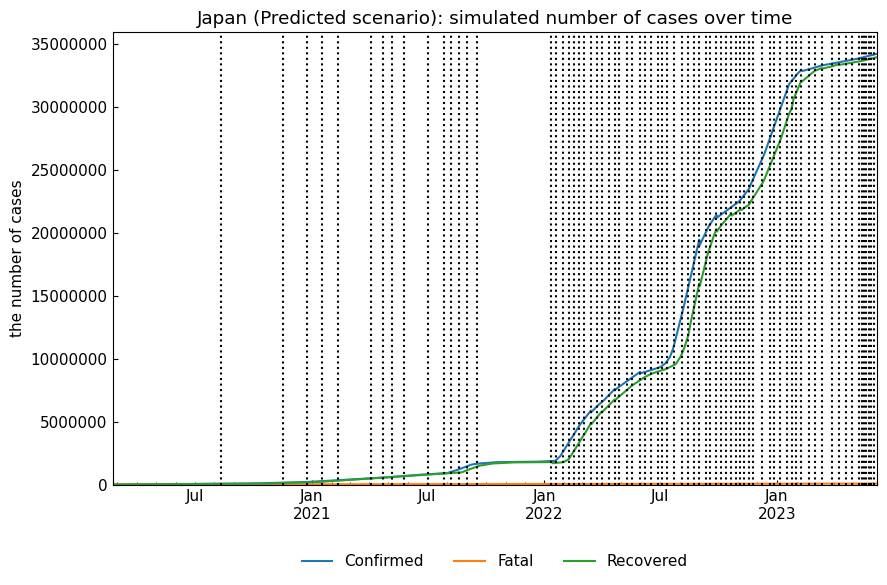

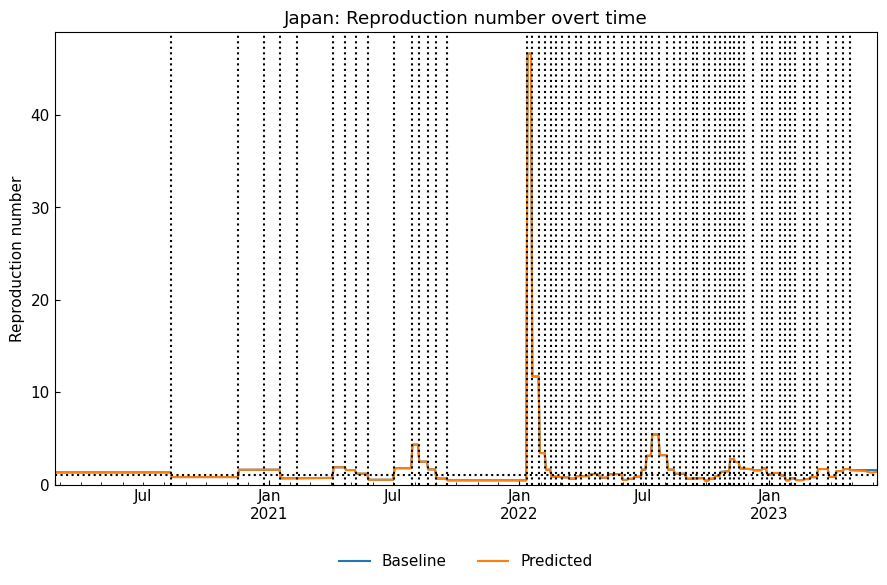

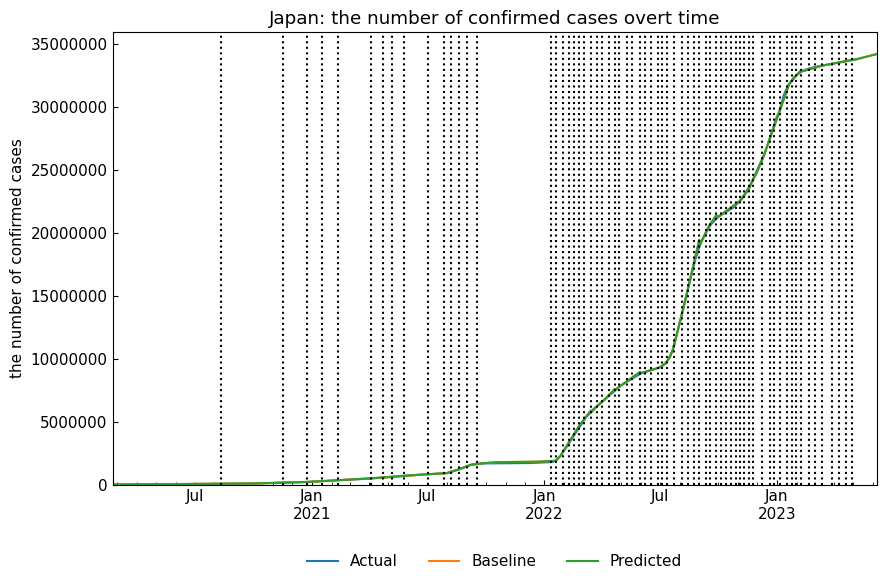

,max(Infected),argmax(Infected),Confirmed on 07Jun2023,Infected on 07Jun2023,Fatal on 07Jun2023
Baseline,3884637.0,2022-08-15,34240088.0,226388.0,75630.0
Predicted,3884637.0,2022-08-15,34219504.0,191202.0,75626.0


In [1]:
import covsirphy as cs
# Data preparation,time-series segmentation, parameter estimation with SIR-F model
snr = cs.ODEScenario.auto_build(geo="Japan", model=cs.SIRFModel)
# Check actual records
snr.simulate(name=None);
# Show the result of time-series segmentation
snr.to_dynamics(name="Baseline").detect();
# Perform simulation with estimated ODE parameter values
snr.simulate(name="Baseline");
# Predict ODE parameter values (30 days from the last date of actual records)
snr.build_with_template(name="Predicted", template="Baseline");
snr.predict(days=30, name="Predicted");
# Perform simulation with estimated and predicted ODE parameter values
snr.simulate(name="Predicted");
# Add a future phase to the baseline (ODE parameters will not be changed)
snr.append();
# Show created phases and ODE parameter values
snr.summary()
# Compare reproduction number of scenarios (predicted/baseline)
snr.compare_param("Rt");
# Compare simulated number of cases
snr.compare_cases("Confirmed");
# Describe representative values
snr.describe()